In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [4]:
#import streamlit as st
import numpy as np
import pandas as pd
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [24]:
df = web.DataReader('BTC-USD', data_source='yahoo', start = '2018-01-01', end = '2022-08-09')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,14112.200195,13154.700195,14112.200195,13657.200195,10291200000,13657.200195
2018-01-02,15444.599609,13163.599609,13625.000000,14982.099609,16846600192,14982.099609
2018-01-03,15572.799805,14844.500000,14978.200195,15201.000000,16871900160,15201.000000
2018-01-04,15739.700195,14522.200195,15270.700195,15599.200195,21783199744,15599.200195
2018-01-05,17705.199219,15202.799805,15477.200195,17429.500000,23840899072,17429.500000


In [25]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-06,23326.562500,22961.279297,23291.423828,22961.279297,15978259885,22961.279297
2022-08-07,23359.009766,22894.556641,22963.505859,23175.890625,15886817043,23175.890625
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359
2022-08-10,24126.781250,22773.726562,23126.421875,23983.406250,28367517696,23983.406250


In [7]:
from keras.engine import training
data = df.filter(['Close'])
dataset= data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1347

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.16198395],
       [0.18257929],
       [0.18598206],
       ...,
       [0.31979952],
       [0.3097705 ],
       [0.32211491]])

In [9]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.16198395, 0.18257929, 0.18598206, 0.19217201, 0.22062372,
       0.22213934, 0.20582659, 0.18550172, 0.17656812, 0.1824425 ,
       0.15807598, 0.16701114, 0.17291197, 0.1637685 , 0.16451154,
       0.12830297, 0.12360997, 0.12806047, 0.13012016, 0.15020097,
       0.13000667, 0.11961186, 0.11863253, 0.12626504, 0.12471056,
       0.12334262, 0.12752884, 0.13290112, 0.12528572, 0.10678581,
       0.10857035, 0.09223958, 0.0869576 , 0.09230751, 0.0783498 ,
       0.05780358, 0.0702197 , 0.0681569 , 0.07817228, 0.08549997,
       0.08371107, 0.0760641 , 0.08844711, 0.08334435, 0.0972775 ,
       0.10772006, 0.10876934, 0.12243013, 0.11371103, 0.12418047,
       0.12695368, 0.11586555, 0.10521112, 0.10981394, 0.1022276 ,
       0.09992169, 0.11083369, 0.11641272, 0.11131869, 0.11991653])]
[0.12202130528365762]

[array([0.16198395, 0.18257929, 0.18598206, 0.19217201, 0.22062372,
       0.22213934, 0.20582659, 0.18550172, 0.17656812, 0.1824425 ,
       0.15807598, 0.16701114, 0.17

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train =np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1287, 60, 1)

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1287/1287 [==============================] - 25s 17ms/step - loss: 0.0023


In [17]:
test_data = scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [18]:
x_test = np.array(x_test)

In [19]:
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [20]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


11/11 [==============================] - 1s 12ms/step


In [26]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2589.3079543340773

C:\Users\Saketh\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


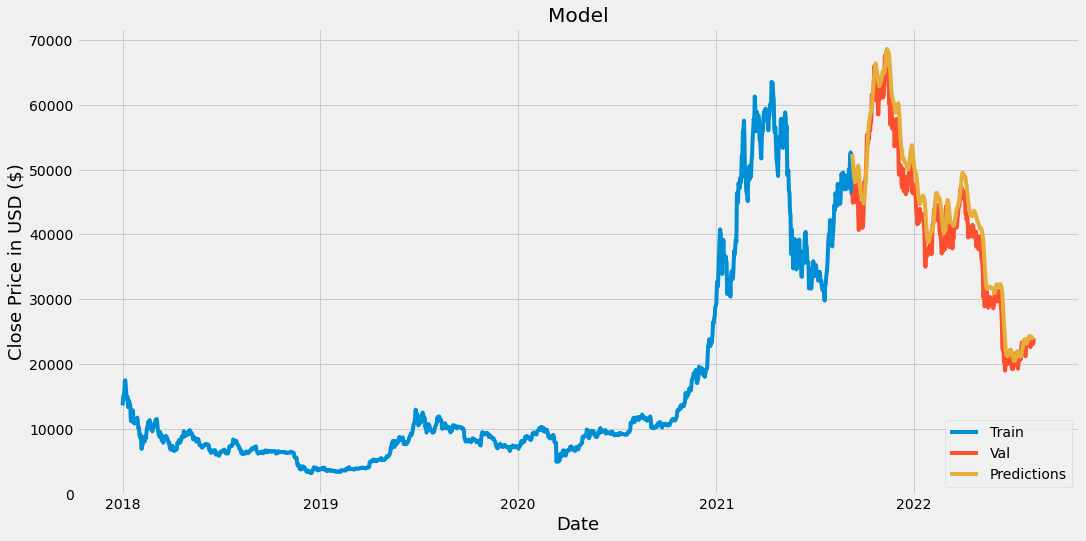

In [27]:
train= data[:training_data_len]
valid= data[training_data_len:]
valid['Predictions']= predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price in USD ($)', fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
valid

,Close,Predictions
Date,,
2021-09-09,46391.421875,52393.242188
2021-09-10,44883.910156,51363.230469
2021-09-11,45201.457031,50155.835938
2021-09-12,46063.269531,49135.796875
2021-09-13,44963.074219,48543.589844
...,...,...
2022-08-06,22961.279297,24108.685547
2022-08-07,23175.890625,24058.904297
2022-08-08,23809.486328,24054.666016


In [29]:
btc_quote = web.DataReader('BTC-USD',data_source='yahoo', start = '2018-01-01', end = '2022-08-09')
new_df= btc_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 25ms/step
[[24413.295]]


In [34]:
#print(type(X_test.dim))

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

In [30]:
X_test

array([[[0.36570593],
        [0.29924774],
        [0.29488593],
        [0.30057606],
        [0.26651439],
        [0.26791082],
        [0.24531112],
        [0.26918221],
        [0.26990141],
        [0.27162782],
        [0.26038008],
        [0.27746148],
        [0.27972759],
        [0.28393529],
        [0.27655083],
        [0.27201459],
        [0.26494412],
        [0.26219873],
        [0.25723531],
        [0.24922414],
        [0.2488027 ],
        [0.24965487],
        [0.26417663],
        [0.26353701],
        [0.2691041 ],
        [0.28603773],
        [0.28749163],
        [0.28533229],
        [0.27395724],
        [0.26012401],
        [0.25007206],
        [0.26387836],
        [0.26944101],
        [0.27358228],
        [0.27908497],
        [0.27269647],
        [0.29922133],
        [0.31326988],
        [0.31081844],
        [0.30977532],
        [0.30278559],
        [0.29890715],
        [0.30114072],
        [0.28174912],
        [0.27985347],
        [0

In [57]:
btc_quote2= web.DataReader('BTC-USD', data_source='yahoo', start = '2022-08-01', end = '2022-08-04')
print(btc_quote2['Close'])

Date
2022-08-01    23314.199219
2022-08-02    22978.117188
2022-08-03    22846.507812
2022-08-04    22630.957031
2022-08-05    23289.314453
Name: Close, dtype: float64


In [53]:
model.save("model_new")
print("Saved new model to disk")

INFO:tensorflow:Assets written to: model_new\assets


INFO:tensorflow:Assets written to: model_new\assets


Saved new model to disk


In [54]:
loaded_model = tf.keras.models.load_model("model_new")
loaded_model.build()
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
